In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers.merge import concatenate

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
from tensorflow import keras

In [ ]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
import cv2, numpy as np

In [ ]:
train_datagen_with_aug = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   zoom_range=[0.2,0.5],
                                   width_shift_range = 0.3,
                                   height_shift_range = 0.3,
                                   validation_split=0.2)

train_generator = train_datagen_with_aug.flow_from_directory(
    r'C:\Users\Harshil Bhandari\Pictures\X-Ray Images Dataset for research project',
    target_size=(224, 224),
    batch_size=32,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='training'
    ) # set as training data

validation_generator = train_datagen_with_aug.flow_from_directory(
    r'C:\Users\Harshil Bhandari\Pictures\X-Ray Images Dataset for research project', # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
    ) # set as validation data

input_img = Input(shape=(224, 224, 3))

Found 5171 images belonging to 3 classes.
Found 1292 images belonging to 3 classes.


In [ ]:
from keras.applications import VGG16

VGG_16_MODEL = Sequential()

vgg16 = keras.applications.vgg16.VGG16(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=(224,224,3), pooling='max', classes=3,
    classifier_activation='softmax'
)

for layer in vgg16.layers:
    layer.trainable = False 
    
VGG_16_MODEL.add(vgg16)
VGG_16_MODEL.add(Flatten())
VGG_16_MODEL.add(Dense(512,activation='relu'))
VGG_16_MODEL.add(Dense(3, activation='softmax'))

VGG_16_MODEL.summary()

sgd = SGD(learning_rate=0.001, momentum=0.9)

VGG_16_MODEL.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

graph = VGG_16_MODEL.fit(train_generator, validation_data=validation_generator, epochs=25)

graph

58892288/58889256 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 14,978,883
Trainable params: 264,195
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/25
162/162 [==============================] - 1763s 11s/step - loss: 0.9712 - accuracy: 0.5301 - val_loss: 0.9300 - val_accuracy: 0.5743
Epoch 2/25
162/162 [======

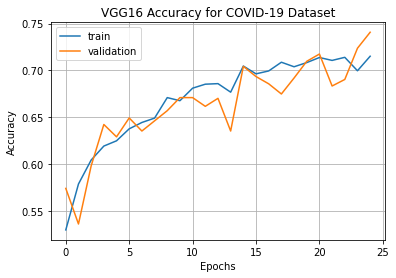

In [ ]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()

plt.plot(graph.history['accuracy'])
plt.plot(graph.history['val_accuracy'])

# plt.axis(ymin=0.4, ymax=1)
plt.grid()

plt.title('VGG16 Accuracy for COVID-19 Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])

plt.show()

In [ ]:
max_acc = max(graph.history['val_accuracy'])

print('The highest accuracy achieved using VGG16 model with input 224x224 is',max_acc*100)

The highest accuracy achieved using VGG16 model with input 224x224 is 74.071204662323
